In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Data

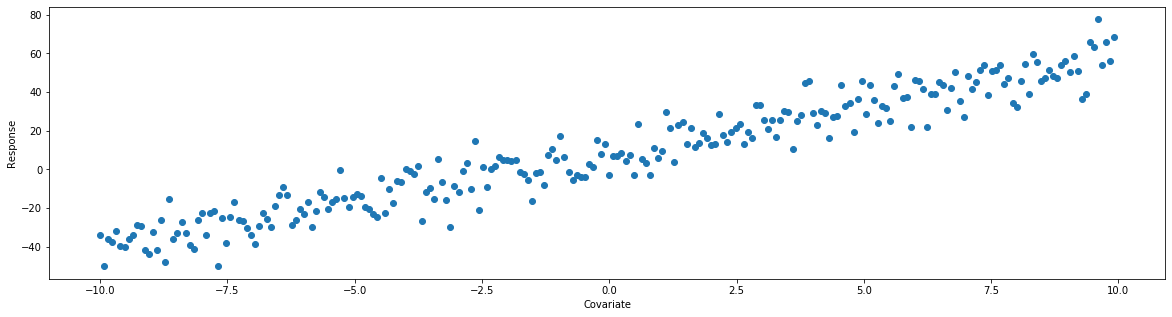

In [2]:
n_samples = 250
noise_level = 8
params = {"m": 5, "c": 8}
limit = (-10, 10)


X = np.arange(limit[0], limit[1], (limit[1]-limit[0])/n_samples)
Y = params["m"]*X + params["c"] + noise_level*np.random.randn(*X.shape)

plt.figure(figsize=(20, 5))
plt.scatter(X, Y)
plt.xlabel("Covariate")
plt.ylabel("Response")
plt.show()

### Solving Using Normal Equations

The squared loss is defiend as
$$J(\theta) = {1 \over 2}(X\theta - Y)^T(X\theta - Y)$$

We can locate the critical point of the $F(\theta)$ using first order derivate method.
$$\Delta_\theta J(\theta) = \Delta_\theta {1 \over 2}(X\theta - Y)^T(X\theta - Y)$$
$$\Delta_\theta J(\theta) = {1 \over 2} \Delta_\theta (\theta^TX^TX\theta -\theta^TX^TY - Y^TX\theta + Y^TY)$$
Trace of a real number is a real number. Hence we can write
$$\Delta_\theta J(\theta) = {1 \over 2} \Delta_\theta Trace(\theta^TX^TX\theta -\theta^TX^TY - Y^TX\theta + Y^TY)$$
$$\Delta_\theta J(\theta) = {1 \over 2} \Delta_\theta (Trace(\theta^TX^TX\theta) - 2Trace(Y^TX\theta))$$
Trace of a real number is a real number. Hence we can write
$$\Delta_\theta J(\theta) = {1 \over 2} \Delta_\theta (\theta^TX^TX\theta - 2Y^TX\theta)$$
$$\Delta_\theta J(\theta) = {1 \over 2} \Delta_\theta (2X^TX\theta - 2Y^TX)$$
$$\Delta_\theta J(\theta) = X^TX\theta - Y^TX$$

The critical point of $J(\theta)$ is 
$$\Delta_\theta J(\theta) = 0$$
$$X^TX\theta - Y^TX = 0$$
$$X^TX\theta = Y^TX$$
$$\theta = (X^TX)^{-1}X^TY$$

In [3]:
# Data Transformation to use the Normal Equations.

X_ = X.reshape(-1, 1)
X_ = np.hstack([np.ones_like(X_), X_])
Y_ = Y.reshape(-1, 1)

theta = list(np.squeeze(np.matmul(np.linalg.inv(np.matmul(X_.T, X_)), np.matmul(X_.T, Y_))))

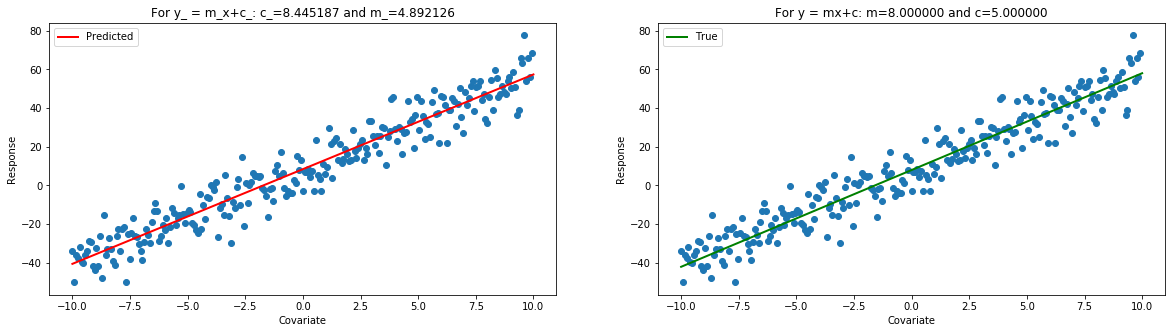

In [4]:
# Visualization

plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
plt.scatter(X, Y)
plt.plot([*limit], [limit[0]*theta[1] + theta[0], limit[1]*theta[1] + theta[0]], 
         lw=2, 
         color="red", 
         label="Predicted")
plt.xlabel("Covariate")
plt.ylabel("Response")
plt.title("For y_ = m_x+c_: c_={:0.6f} and m_={:0.6f}".format(*theta))
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X, Y)
plt.plot([*limit], [limit[0]*params["m"] + params["c"], limit[1]*params["m"] + params["c"]], 
         lw=2,
         color="green", 
         label="True")
plt.xlabel("Covariate")
plt.ylabel("Response")
plt.title("For y = mx+c: m={:0.6f} and c={:0.6f}".format(params["c"], params["m"]))
plt.legend()
plt.show()

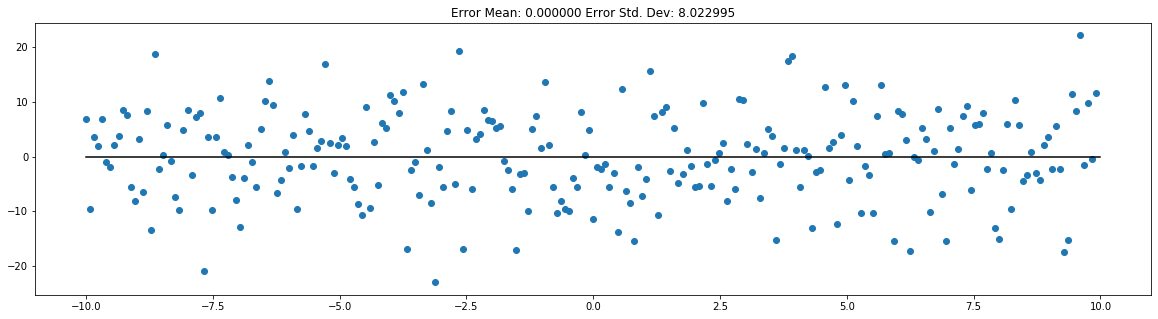

In [5]:
# Residuals

Y_bar = Y -(X*theta[1] + theta[0])

plt.figure(figsize=(20, 5))
plt.scatter(X, Y_bar)
plt.plot([*limit], [0, 0], "black")
plt.title("Error Mean: {:0.6f} Error Std. Dev: {:0.6f}".format(np.mean(Y_bar), np.std(Y_bar)))
plt.show()

### Solving Using Probabilistic Interpretation

Assume data is distributed as
$$y_i \sim N (\theta^Tx_i, \sigma^2)$$

The probability is defined as 
$$p(y_i|x_i, \theta) = {1 \over \sqrt{2\pi \sigma^2}}\exp{\Bigg(-\frac{(y_i - \theta^Tx_i)^2}{2\sigma^2}\Bigg)}$$


The joint likelihood is defiend as
$$L(\theta) = L(\theta|X,Y)$$
$$L(\theta) = p(Y|X, \theta)$$
$$L(\theta) = \prod_{i=1}^{n}p(y_i|x_i, \theta)$$
$$L(\theta) = {1 \over (2\pi \sigma^2)^{n/2}}\exp{\Bigg(-\frac{\sum_{i=1}^{n}(y_i - \theta^Tx_i)^2}{2\sigma^2}\Bigg)}$$
Lets take log both side [$\log(L(\theta)) = l(\theta)$]
$$l(\theta) = -{n \over 2}log(2\pi) - {n \over 2}log(\sigma^2) - {1 \over 2\sigma^2}\sum_{i=1}^{n}(y_i - \theta^Tx_i)^2$$
$$l(\theta) = -{n \over 2}log(2\pi) - {n \over 2}log(\sigma^2) - {1 \over 2\sigma^2}\sum_{i=1}^{n}(\theta^Tx_i - y_i)^2$$
$$l(\theta) = -{n \over 2}log(2\pi) - {n \over 2}log(\sigma^2) - {1 \over 2\sigma^2}(\theta^TX - Y)^T(\theta^TX - Y)$$

Diffrentiate and equat it to zero.

$$\Delta_\theta l(\theta) = 0$$
$$- {1 \over 2\sigma^2} \Delta_\theta (Y - \theta^TX)^T(Y - \theta^TX)^T= 0$$

This is same as last case. Hence
$$\theta = (X^TX)^{-1}X^TY$$

But here we can choice to estimate the value of $\sigma^2$ also. So let's diffrentiate the $l(\theta)$ with respect to $\sigma^2$
$${\partial l \over \partial \sigma^2} = 0$$
$$-{n \over 2\sigma^2} + {1 \over 2\sigma^4}(\theta^TX - Y)^T(\theta^TX - Y)= 0$$
$$\sigma^2 = \frac{(\theta^TX - Y)^T(\theta^TX - Y)}{n}$$

In [6]:
# Visualization are same as last case.

### Solving using batch stochastic gradient descend

Let loss function be

$$L(\theta) = {1 \over 2n}\sum_{i=1}^{n}(\theta^Tx_i - y_i)^2$$

Take gradient of loss fuction. Assume we take a batch of size b. Then

$$\Delta_\theta = {1 \over b}\sum_{i=1}^{b}(\theta^Tx_i - y_i)x_i$$

With the gradient the parametrs can be updated as

$$\theta := \theta - \alpha \Delta_\theta$$
$$\theta := \theta - \alpha \sum_{i=1}^{b}{(\theta^Tx_i - y_i)x_i \over b}$$

In [7]:
def plot_line(theta, msg):
    plt.figure(figsize=(20, 5))

    plt.subplot(1, 2, 1)
    plt.scatter(X, Y, color="blue", alpha=0.5)
    plt.plot([*limit], [limit[0]*theta[1] + theta[0], limit[1]*theta[1] + theta[0]], 
             lw=2, 
             color="red", 
             label="Predicted")
    plt.xlabel("Covariate")
    plt.ylabel("Response")
    plt.title("{}. For y_ = m_x+c_: c_={:0.6f} and m_={:0.6f}".format(msg, *theta))
    plt.legend()
    
    Y_bar = Y -(X*theta[1] + theta[0])
    
    plt.subplot(1, 2, 2)
    plt.scatter(X, Y_bar, color="black", alpha=0.5)
    plt.plot([*limit], [0, 0], "black")
    plt.title("Residulas Plot => Error Mean: {:0.6f} Error Std. Dev: {:0.6f}".format(np.mean(Y_bar), np.std(Y_bar)))
    
    plt.show()

In [8]:
# Adjusting shape of Data

X_ = X.reshape(-1, 1)
X_ = np.hstack([np.ones_like(X_), X_])
Y_ = Y.reshape(-1, 1)

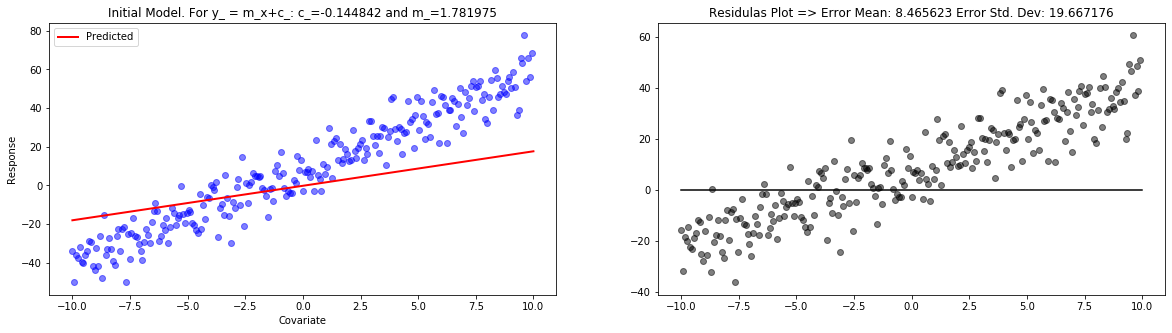

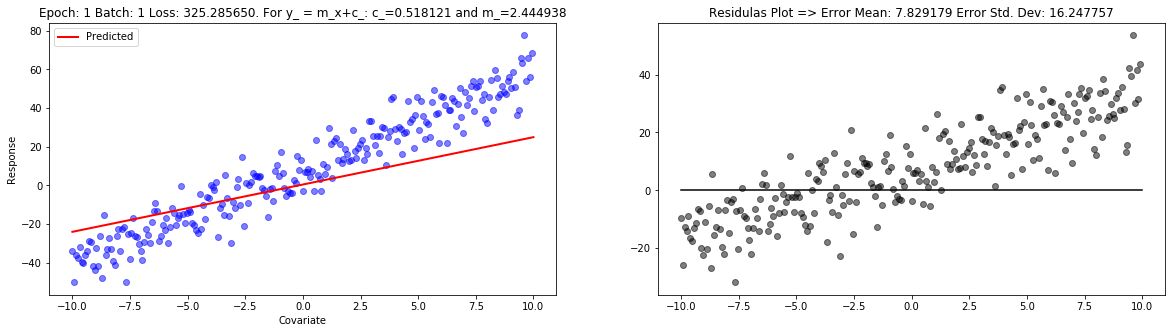

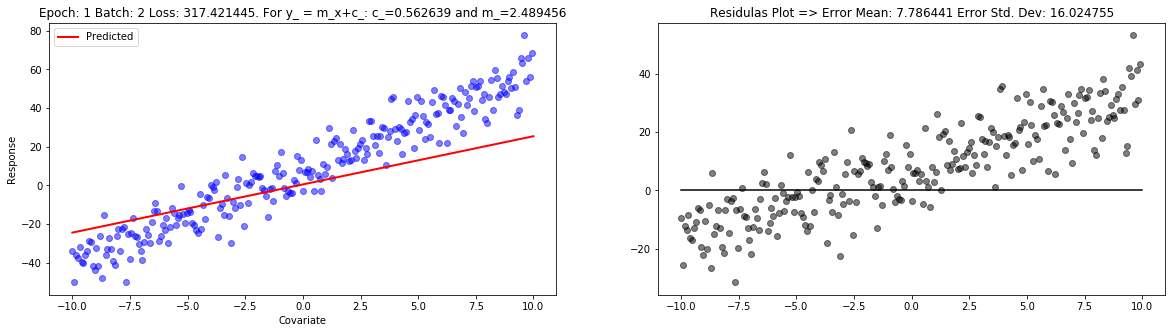

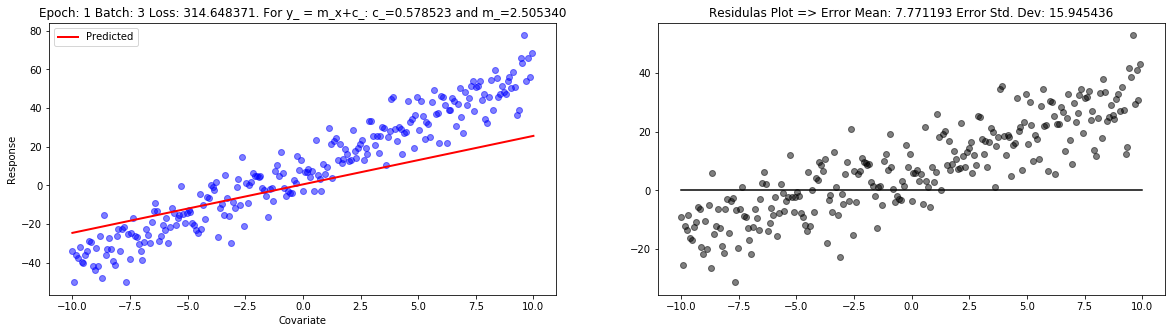

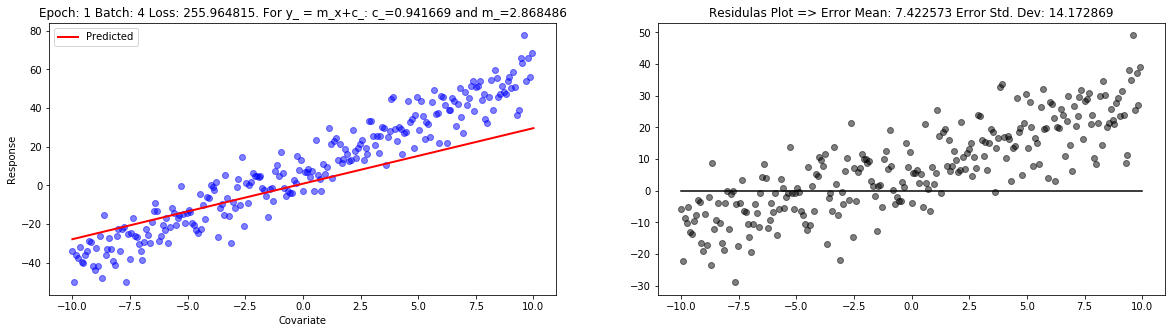

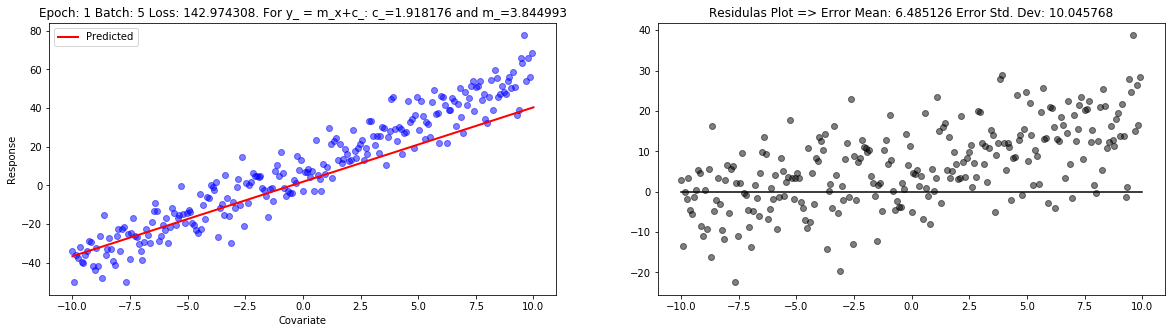

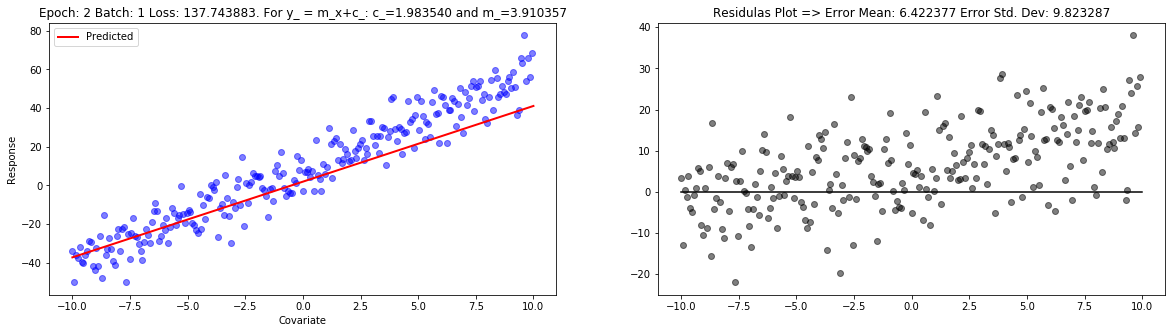

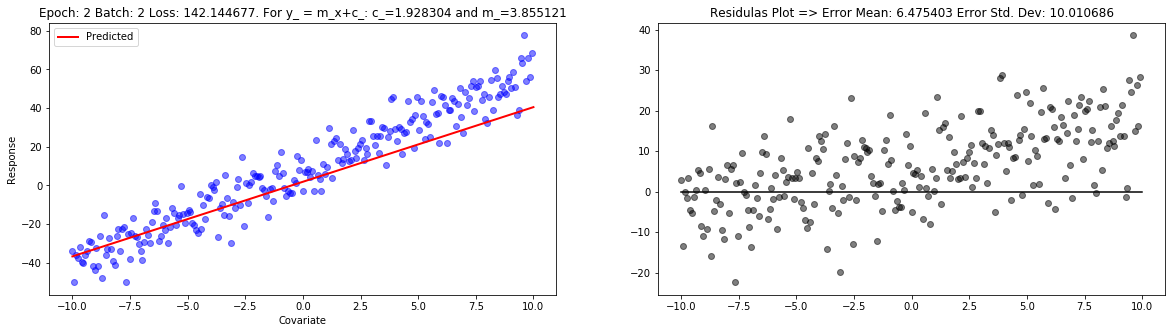

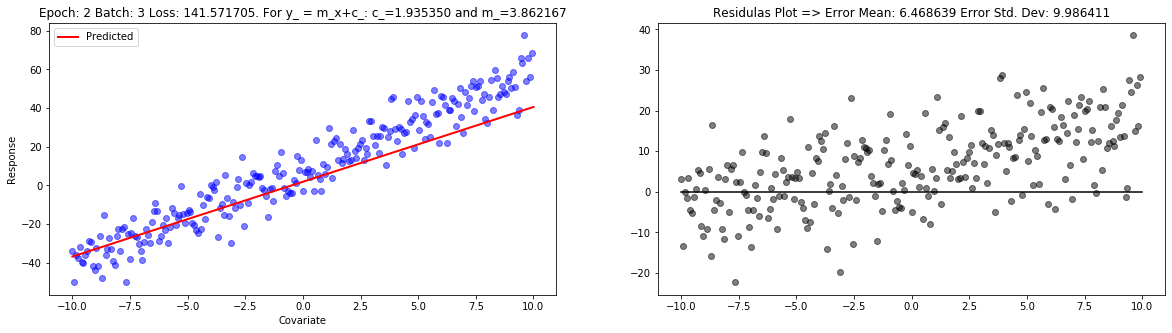

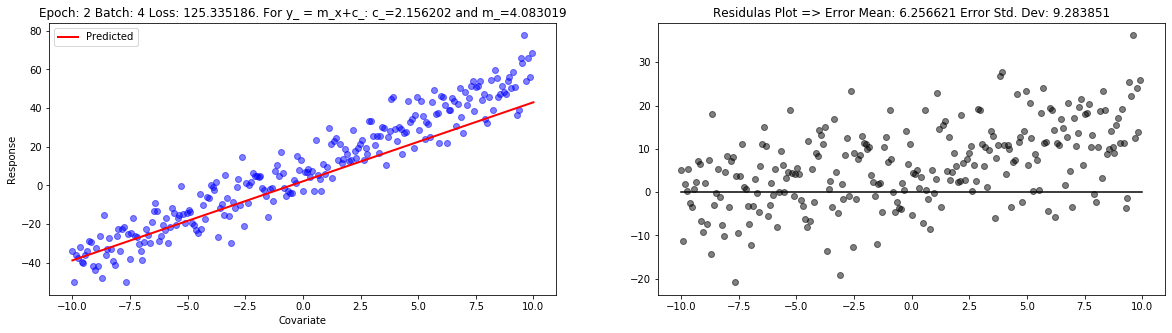

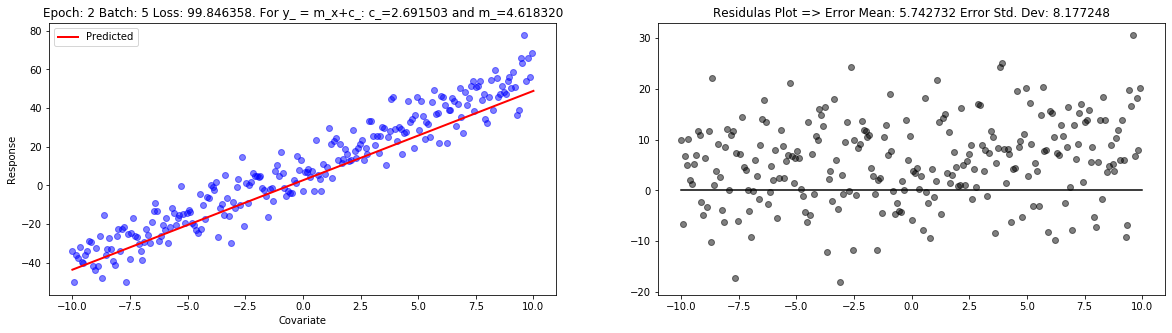

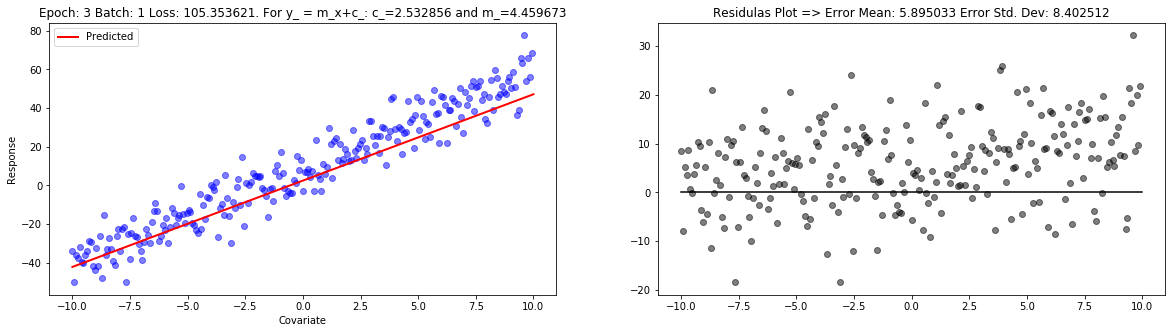

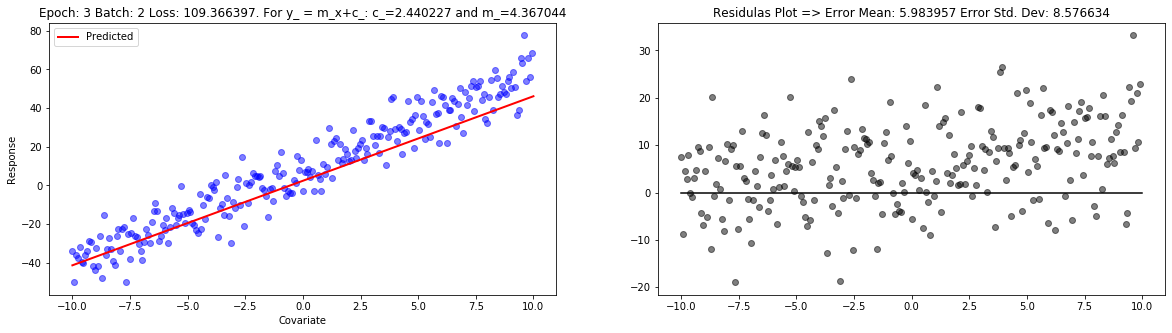

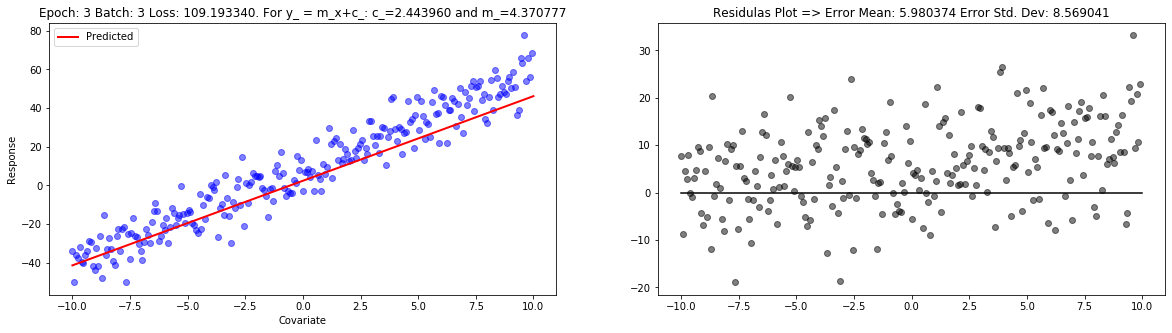

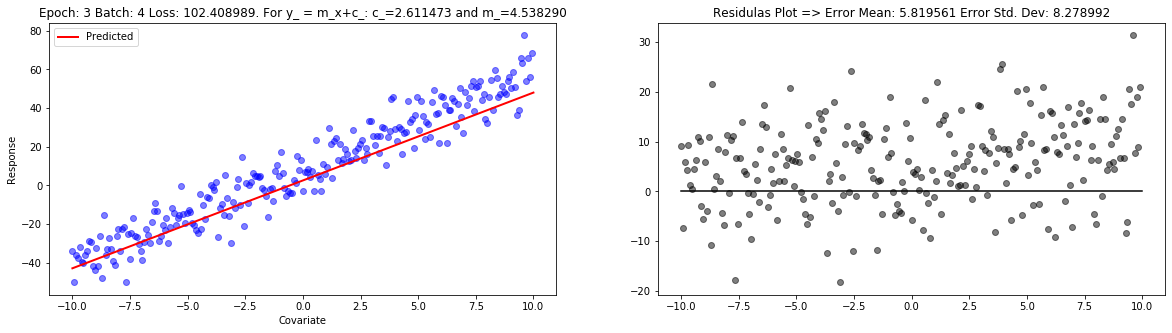

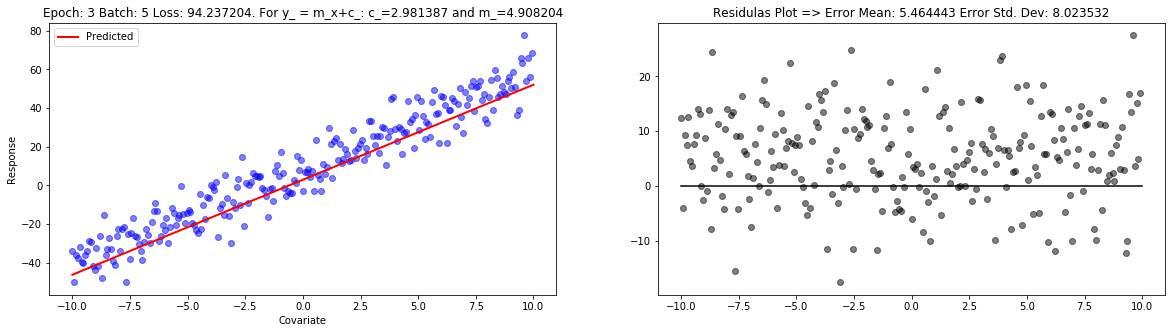

In [9]:
# Initialie parametrs with some small random values.

theta = np.random.normal((2,1))

# Setting Hyperparameters

epochs = 3
batch_size = n_samples//5
alpha = 0.005
loss = []
theta_updates = []

plot_line(theta, "Initial Model")
theta_updates.append(list(theta))

# Training
for i in range(epochs):
    for j in range(5):
        si = j*batch_size
        ei = min((j+1)*batch_size, n_samples)
        theta -= alpha * np.matmul((np.matmul(X_[si:ei], theta).reshape(-1, 1) - Y_[si:ei]).T, X[si:ei])/batch_size
        theta_updates.append(list(theta))
        loss.append(np.mean((np.matmul(X_, theta).reshape(-1, 1) - Y_)**2))
        plot_line(theta, "Epoch: {} Batch: {} Loss: {:0.6f}".format(i+1, j+1, loss[-1]))

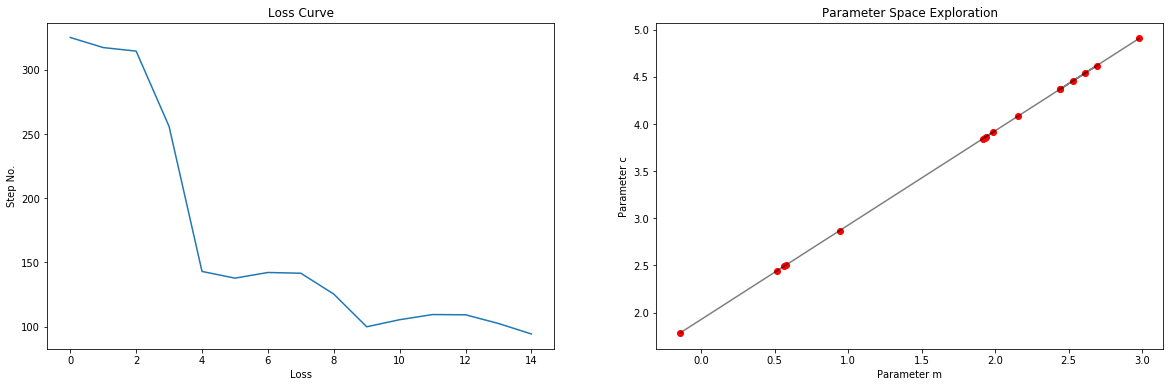

In [10]:
# Loss Curve

plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)
plt.plot(loss)
plt.title("Loss Curve")
plt.xlabel("Loss")
plt.ylabel("Step No.")


theta_updates = np.array(theta_updates)

plt.subplot(1, 2, 2)
plt.scatter(theta_updates[:,0], theta_updates[:,1], color="red")
plt.plot(theta_updates[:,0], theta_updates[:,1], color="black", alpha=0.5)
plt.xlabel("Parameter m")
plt.ylabel("Parameter c")
plt.title("Parameter Space Exploration")

plt.show()